In [1]:
import numpy as np
import pandas as pd
from pandas import read_csv
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

#for one-hot encoding various categories of labels
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [2]:
dataset = read_csv('train.csv')


In [3]:
print(dataset)

     class cap-shape cap-surface cap-color bruises odor gill-attachment  \
0        e         x           y         g       t    n               f   
1        e         x           f         w       f    n               f   
2        e         x           y         g       t    n               f   
3        p         f           f         g       f    f               f   
4        p         x           y         w       t    p               f   
...    ...       ...         ...       ...     ...  ...             ...   
7119     e         x           f         g       t    n               f   
7120     p         k           y         e       f    s               f   
7121     p         x           s         n       f    s               f   
7122     p         x           s         e       f    s               f   
7123     e         x           y         n       t    l               f   

     gill-spacing gill-size gill-color  ... stalk-surface-below-ring  \
0               c         b

In [4]:
data_dummy = pd.get_dummies(dataset["class"],drop_first=True).iloc[:,:].values   #creating arrays for dummy variables
print(data_dummy.shape)
for columns in dataset.columns:
    if(columns == "class"):
        continue
    data_dummy = np.append(data_dummy,pd.get_dummies(dataset[columns],drop_first=True).iloc[:,:].values,axis=1)
print(data_dummy.shape)

(7124, 1)
(7124, 96)


In [5]:
print(data_dummy)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]]


In [6]:
X = data_dummy[:,1:]
print(X.shape)
print(X)

Y = data_dummy[:,0]  # 1 = poisonous
print(Y.shape)
print(Y)

(7124, 95)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]]
(7124,)
[0. 0. 0. ... 1. 1. 0.]


In [7]:
np.sum(dataset.describe().iloc[:,:].values[1]) - 23

96

In [8]:
dataset.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,7124,7124,7124,7124,7124,7124,7124,7124,7124,7124,...,7124,7124,7124,7124,7124,7124,7124,7124,7124,7124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,3695,3199,2830,1997,4148,3096,6942,5970,4914,1512,...,4327,3943,3845,7124,6949,6569,3495,2082,3547,2768


In [9]:
print(dataset.groupby('class').size())

class
e    3695
p    3429
dtype: int64


In [10]:
# Split-out validation dataset
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=0.2, random_state=1)

In [11]:
#Check Algorithms
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))

model_dict = {}
model_dict['LR'] = LogisticRegression(solver='liblinear', multi_class='ovr')
model_dict['LDA'] = LinearDiscriminantAnalysis()
model_dict['KNN'] = KNeighborsClassifier()
model_dict['NB'] = GaussianNB()
model_dict['SVM'] = SVC(gamma='auto')

# evaluate each model in turn
results = []
names = []  
accuracy = {}  #dictionary to map model names to their average accuracy on k-fold cross validation
for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    accuracy[name] = cv_results.mean()
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))
    

LR: 0.999298 (0.001164)
LDA: 0.999298 (0.001164)
KNN: 0.999649 (0.001053)
NB: 0.931393 (0.013683)
SVM: 0.996666 (0.002280)


In [12]:
print(max(accuracy.keys()))

SVM


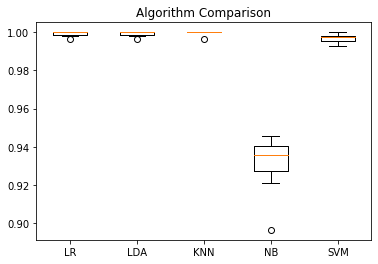

In [13]:
# Compare Algorithms
pyplot.boxplot(results, labels=names)
pyplot.title('Algorithm Comparison')
pyplot.show()

In [14]:
# Make predictions on the model with best accuracy
best_model = max(accuracy.keys())
print(best_model)


SVM


In [15]:
model = model_dict[best_model]
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)   #final predictions by the best model
print(predictions)

[1. 0. 1. ... 0. 0. 1.]


In [16]:
# Evaluate predictions
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.9971929824561403
[[730   0]
 [  4 691]]
              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00       730
         1.0       1.00      0.99      1.00       695

    accuracy                           1.00      1425
   macro avg       1.00      1.00      1.00      1425
weighted avg       1.00      1.00      1.00      1425



In [17]:
test = pd.read_csv('Q1_Mushroom_test.csv')

In [18]:
dataset_rows_original = dataset.shape[0]
dataset = dataset.drop(columns=['class'])

In [19]:
print(test)

    cap-shape cap-surface cap-color bruises odor gill-attachment gill-spacing  \
0           f           y         n       f    s               f            c   
1           x           s         e       f    s               f            c   
2           f           s         w       f    n               f            w   
3           b           y         y       t    l               f            c   
4           f           f         g       f    n               f            w   
..        ...         ...       ...     ...  ...             ...          ...   
995         f           y         e       f    s               f            c   
996         f           y         e       t    n               f            c   
997         x           y         n       f    y               f            c   
998         x           y         g       t    n               f            c   
999         k           y         n       f    f               f            c   

    gill-size gill-color st

In [20]:
dataset = dataset.append(test)   #to take care of missing categorical data in test file while one-hot encoding to fit into model

In [21]:
print(dataset.shape)

(8124, 22)


In [22]:

X_new = test.iloc[:,:].values   #assign new input csv file(with same format of column names, except, there should be no 'class' column) to be predicted
print(X_new.shape)


#encoding the input array into the same format in which model was trained
X_dummy = pd.get_dummies(dataset["cap-shape"],drop_first=True).iloc[:,:].values   #creating arrays for dummy variables
print(X_dummy.shape)
for columns in dataset.columns:
    if(columns == "cap-shape"):
        continue
    X_dummy = np.append(X_dummy,pd.get_dummies(dataset[columns],drop_first=True).iloc[:,:].values,axis=1)
print(X_dummy.shape)

(1000, 22)
(8124, 5)
(8124, 95)


In [23]:
test_final = X_dummy[dataset_rows_original:]


In [24]:
print(test_final.shape)

(1000, 95)


In [25]:
predictions = model.predict(X_dummy[dataset_rows_original:])

In [26]:
print(list(predictions))

[1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0,

In [27]:
result = []
for x in predictions:
    if x == 1.0:
        result.append('p')
    else:
        result.append('e')

In [28]:
len(result)

1000

In [29]:
print(result)

['p', 'p', 'e', 'e', 'e', 'p', 'p', 'e', 'p', 'p', 'p', 'p', 'e', 'e', 'p', 'e', 'p', 'e', 'e', 'p', 'e', 'p', 'p', 'p', 'e', 'p', 'p', 'p', 'e', 'e', 'e', 'e', 'e', 'p', 'e', 'e', 'p', 'e', 'e', 'p', 'e', 'p', 'e', 'e', 'p', 'p', 'e', 'e', 'p', 'p', 'e', 'p', 'p', 'e', 'e', 'p', 'p', 'p', 'p', 'p', 'e', 'e', 'p', 'e', 'p', 'p', 'p', 'e', 'p', 'e', 'p', 'e', 'p', 'p', 'p', 'e', 'e', 'e', 'p', 'p', 'p', 'p', 'p', 'e', 'e', 'p', 'e', 'e', 'p', 'e', 'e', 'p', 'e', 'p', 'p', 'e', 'p', 'p', 'e', 'p', 'e', 'p', 'e', 'p', 'p', 'p', 'p', 'p', 'e', 'e', 'e', 'e', 'e', 'p', 'e', 'p', 'p', 'e', 'e', 'e', 'p', 'p', 'p', 'e', 'e', 'e', 'e', 'e', 'p', 'p', 'e', 'p', 'p', 'e', 'e', 'e', 'p', 'e', 'p', 'p', 'p', 'p', 'p', 'e', 'p', 'p', 'p', 'e', 'p', 'p', 'e', 'p', 'p', 'p', 'e', 'e', 'p', 'p', 'e', 'e', 'e', 'e', 'e', 'p', 'e', 'p', 'e', 'p', 'e', 'p', 'e', 'e', 'p', 'e', 'p', 'p', 'e', 'e', 'p', 'e', 'e', 'e', 'p', 'e', 'e', 'e', 'p', 'p', 'p', 'p', 'e', 'p', 'e', 'e', 'e', 'e', 'p', 'p', 'p', 'p',

In [30]:
with open('result.txt','w') as txt:
    for pred in result:
        txt.write(pred+"\n")